In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sympy as spy
from IPython.display import display, Image
spy.init_printing()

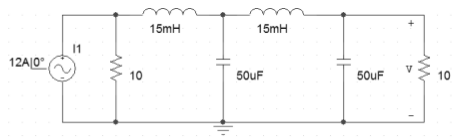

In [2]:
Image("Circuit.png")

Using a Thevenin equivalent, and taking the currents from left to right in clockwise direction:

$$120 V = \mathbb{Z}_R\mathbb{I}_1 + \mathbb{Z}_L\mathbb{I}_1 + \mathbb{Z}_C(\mathbb{I}_1 - \mathbb{I}_2)$$

$$ 0 = \mathbb{Z}_C(\mathbb{I}_2 -\mathbb{I}_1) + \mathbb{Z}_L\mathbb{I}_2 + \mathbb{Z}_C(\mathbb{I}_2-\mathbb{I}_3)$$

$$ 0 = \mathbb{Z}_C(\mathbb{I}_3 - \mathbb{I}_2) + \mathbb{Z}_R\mathbb{I}_3 $$

Where $\mathbb{Z}_C = 1/(j\omega c)$, $\mathbb{Z}_L=j\omega L$ and $\mathbb{Z}_R = R$

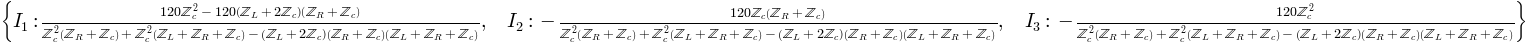

In [3]:
c = spy.symbols('c')
L = spy.symbols('L')
R = spy.symbols('R')

omega = spy.symbols(r'\omega')

Z_c = spy.symbols('\mathbb{Z}_c')
Z_L = spy.symbols('\mathbb{Z}_L')
Z_R = spy.symbols('\mathbb{Z}_R')
I_1 = spy.symbols('I_1')
I_2 = spy.symbols('I_2')
I_3 = spy.symbols('I_3')

system = spy.Matrix(((Z_R+Z_L+Z_c, -Z_c, 0, 120), (-Z_c, 2*Z_c+Z_L, -Z_c, 0), (0, -Z_c, Z_c+Z_R, 0)))
solution = spy.solve_linear_system(system, I_1, I_2, I_3)
display(solution)
I_3 = solution[I_3]

I_3


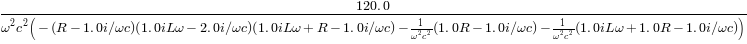

Simplified


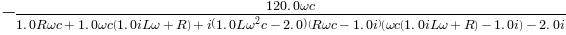

Expanded voltage


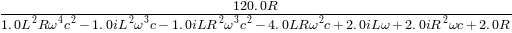

Values


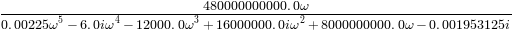

In [4]:
substitutions = [(Z_c, 1/(1j*omega*c)), (Z_R, R), (Z_L, 1j*omega*L)]

I_3 = I_3.subs(substitutions)

print("I_3")
display(I_3)

print("Simplified")
display(spy.simplify(I_3))

V = I_3 * R
print("Expanded voltage")
display(spy.expand(V))

substitutions = [(c, 50e-6), (R, 10), (L, 15e-3)]

print("Values")
V = V.subs(substitutions).simplify()
display(V)

In [5]:
number = 1000

phases = np.zeros((number, 2))
amplitudes = np.zeros((number, 2))
frecuencies = np.zeros((number, 2))

frecuencies[:,0] = np.linspace(1, 10000, number)
frecuencies[:,1] = np.logspace(0, 6, number)

for i in range(2):
    for j in range(number):
        voltage = V.evalf(subs = {omega:frecuencies[j, i]})
    
        imaginary = float(spy.im(voltage))
        real = float(spy.re(voltage))
    
        phase = imaginary/real
        phases[j, i] = np.arctan(phase)
    
        amplitudes[j, i] = abs(voltage)

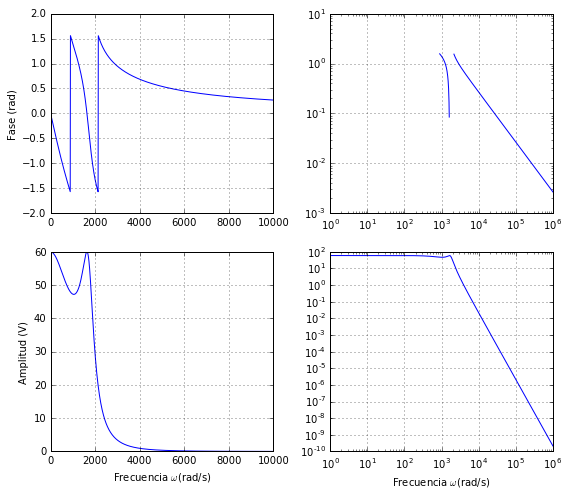

In [6]:
fig, plotMatrix = plt.subplots(2, 2, figsize=(8, 7))

plot_info = [phases, amplitudes]

for (plot, info) in zip(plotMatrix, plot_info):
    for i in range(len(plot)):
        if i == 0:
            plot[i].plot(frecuencies[:, i], info[:, i])
        else:
            plot[i].loglog(frecuencies[:, i], info[:, i])
            
        plot[i].grid(True)

plotMatrix[0, 0].set_ylabel("Fase (rad)")
plotMatrix[1, 0].set_ylabel("Amplitud (V)")

plotMatrix[1, 0].set_xlabel("Frecuencia $\omega$(rad/s)")
plotMatrix[1, 1].set_xlabel("Frecuencia $\omega$(rad/s)")

plt.tight_layout()